<a href="https://colab.research.google.com/github/Greashajain/L1-vs-L2-Regularisation/blob/main/L1_vs_L2_Regularisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo -q

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

In [3]:

%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:


# Fetch the Banknote Authentication dataset from UCI
banknote_authentication = fetch_ucirepo(id=267)

In [5]:
# Extract features and targets
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

# Convert to numpy arrays
X = X.values
y = y.values.ravel()

In [6]:
print(f"\n Dataset Shape: {X.shape}")
print(f" Number of Samples: {X.shape[0]}")
print(f" Number of Features: {X.shape[1]}")
print(f"\n Features: {banknote_authentication.data.features.columns.tolist()}")
print(f"\n Target Distribution:")
print(pd.Series(y).value_counts())
print(f"\n✓ Dataset loaded successfully!")



 Dataset Shape: (1372, 4)
 Number of Samples: 1372
 Number of Features: 4

 Features: ['variance', 'skewness', 'curtosis', 'entropy']

 Target Distribution:
0    762
1    610
Name: count, dtype: int64

✓ Dataset loaded successfully!


In [7]:
# Display first few rows
df = pd.DataFrame(X, columns=banknote_authentication.data.features.columns)
df['Target'] = y
display(df.head(10))

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Test Set Size: {X_test.shape[0]} samples")

# Standardize features (crucial for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✓ Data preprocessing completed!")
print(f"✓ Features standardized (mean=0, std=1)")


Training Set Size: 1097 samples
Test Set Size: 275 samples

✓ Data preprocessing completed!
✓ Features standardized (mean=0, std=1)


In [11]:
# 1. Logistic Regression without regularization
print("\n Training: No Regularization...")
lr_none = LogisticRegression(penalty=None, max_iter=1000, random_state=42)
lr_none.fit(X_train_scaled, y_train)
print("    Completed")

# 2. Logistic Regression with L1 (Lasso) regularization
print(" Training: L1 (Lasso) Regularization...")
lr_l1 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear',
                           max_iter=1000, random_state=42)
lr_l1.fit(X_train_scaled, y_train)
print("    Completed")

# 3. Logistic Regression with L2 (Ridge) regularization
print(" Training: L2 (Ridge) Regularization...")
lr_l2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs',
                           max_iter=1000, random_state=42)
lr_l2.fit(X_train_scaled, y_train)
print("    Completed")

# 4. Elastic Net (combination of L1 and L2)
print(" Training: Elastic Net (L1 + L2)...")
lr_elastic = LogisticRegression(penalty='elasticnet', C=1.0, l1_ratio=0.5,
                                solver='saga', max_iter=1000, random_state=42)
lr_elastic.fit(X_train_scaled, y_train)
print("    Completed")

print("\n All models trained successfully!")



 Training: No Regularization...
    Completed
 Training: L1 (Lasso) Regularization...
    Completed
 Training: L2 (Ridge) Regularization...
    Completed
 Training: Elastic Net (L1 + L2)...
    Completed

 All models trained successfully!


In [13]:
#MODEL PERFORMANCE EVALUATION
print("MODEL PERFORMANCE EVALUATION")


# Make predictions
y_pred_none = lr_none.predict(X_test_scaled)
y_pred_l1 = lr_l1.predict(X_test_scaled)
y_pred_l2 = lr_l2.predict(X_test_scaled)
y_pred_elastic = lr_elastic.predict(X_test_scaled)

# Evaluate models
models = {
    'No Regularization': (lr_none, y_pred_none),
    'L1 (Lasso)': (lr_l1, y_pred_l1),
    'L2 (Ridge)': (lr_l2, y_pred_l2),
    'Elastic Net': (lr_elastic, y_pred_elastic)
}

results = []
for name, (model, y_pred) in models.items():
    accuracy = accuracy_score(y_test, y_pred)
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

    print(f"\n {name}:")
    print(f"   Test Accuracy: {accuracy:.4f}")
    print(f"   CV Accuracy: {cv_scores.mean():.4f} (± {cv_scores.std():.4f})")

    results.append({
        'Model': name,
        'Test_Accuracy': accuracy,
        'CV_Mean': cv_scores.mean(),
        'CV_Std': cv_scores.std()
    })

# Create results dataframe
results_df = pd.DataFrame(results)

print("SUMMARY TABLE")

display(results_df)


MODEL PERFORMANCE EVALUATION

 No Regularization:
   Test Accuracy: 0.9855
   CV Accuracy: 0.9900 (± 0.0034)

 L1 (Lasso):
   Test Accuracy: 0.9818
   CV Accuracy: 0.9854 (± 0.0053)

 L2 (Ridge):
   Test Accuracy: 0.9709
   CV Accuracy: 0.9836 (± 0.0047)

 Elastic Net:
   Test Accuracy: 0.9709
   CV Accuracy: 0.9836 (± 0.0047)
SUMMARY TABLE


,Model,Test_Accuracy,CV_Mean,CV_Std
0,No Regularization,0.985455,0.989975,0.003406
1,L1 (Lasso),0.981818,0.985409,0.005336
2,L2 (Ridge),0.970909,0.983591,0.004658
3,Elastic Net,0.970909,0.983591,0.004658


In [14]:

# Weight Comparison Analysis


print("COEFFICIENT (WEIGHT) COMPARISON")

feature_names = banknote_authentication.data.features.columns.tolist()
weights_comparison = pd.DataFrame({
    'Feature': feature_names,
    'No_Regularization': lr_none.coef_[0],
    'L1_Lasso': lr_l1.coef_[0],
    'L2_Ridge': lr_l2.coef_[0],
    'Elastic_Net': lr_elastic.coef_[0]
})

print("\n Coefficients for each feature:")
display(weights_comparison.style.background_gradient(cmap='coolwarm', axis=1))

# Calculate weight magnitudes
print("\n" + "=" * 60)
print("WEIGHT MAGNITUDE ANALYSIS (L1 Norm)")
print("=" * 60)

weight_magnitudes = {
    'No Regularization': np.sum(np.abs(lr_none.coef_[0])),
    'L1 (Lasso)': np.sum(np.abs(lr_l1.coef_[0])),
    'L2 (Ridge)': np.sum(np.abs(lr_l2.coef_[0])),
    'Elastic Net': np.sum(np.abs(lr_elastic.coef_[0]))
}

for name, magnitude in weight_magnitudes.items():
    print(f"   {name}: {magnitude:.4f}")

# Count zero coefficients (feature selection effect)
print("\n" + "=" * 60)
print("FEATURE SELECTION EFFECT")
print("=" * 60)

zero_threshold = 1e-5
for name, (model, _) in models.items():
    zero_count = np.sum(np.abs(model.coef_[0]) < zero_threshold)
    eliminated = "✓" if zero_count > 0 else "✗"
    print(f"{eliminated} {name}: {zero_count}/{len(feature_names)} features eliminated")


COEFFICIENT (WEIGHT) COMPARISON

 Coefficients for each feature:


,Feature,No_Regularization,L1_Lasso,L2_Ridge,Elastic_Net
0,variance,-19.760648,-7.071631,-4.666009,-5.207407
1,skewness,-22.729256,-8.217988,-4.806524,-5.612740
2,curtosis,-20.848701,-7.360796,-4.398858,-5.090640
3,entropy,-1.298486,0.000000,0.257966,0.203226



WEIGHT MAGNITUDE ANALYSIS (L1 Norm)
   No Regularization: 64.6371
   L1 (Lasso): 22.6504
   L2 (Ridge): 14.1294
   Elastic Net: 16.1140

FEATURE SELECTION EFFECT
✗ No Regularization: 0/4 features eliminated
✓ L1 (Lasso): 1/4 features eliminated
✗ L2 (Ridge): 0/4 features eliminated
✗ Elastic Net: 0/4 features eliminated


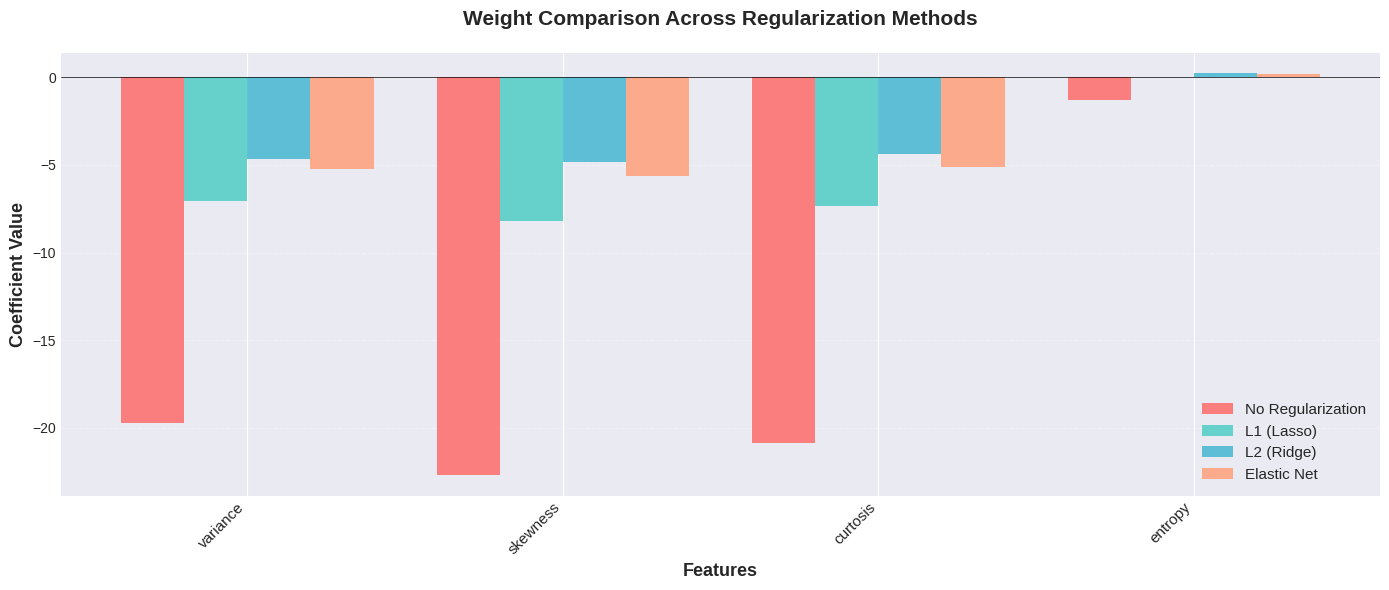

In [15]:

#  Visualization 1 - Weight Comparison Bar Chart

plt.figure(figsize=(14, 6))

x_pos = np.arange(len(feature_names))
width = 0.2

plt.bar(x_pos - 1.5*width, weights_comparison['No_Regularization'],
        width, label='No Regularization', alpha=0.85, color='#FF6B6B')
plt.bar(x_pos - 0.5*width, weights_comparison['L1_Lasso'],
        width, label='L1 (Lasso)', alpha=0.85, color='#4ECDC4')
plt.bar(x_pos + 0.5*width, weights_comparison['L2_Ridge'],
        width, label='L2 (Ridge)', alpha=0.85, color='#45B7D1')
plt.bar(x_pos + 1.5*width, weights_comparison['Elastic_Net'],
        width, label='Elastic Net', alpha=0.85, color='#FFA07A')

plt.xlabel('Features', fontsize=13, fontweight='bold')
plt.ylabel('Coefficient Value', fontsize=13, fontweight='bold')
plt.title('Weight Comparison Across Regularization Methods',
          fontsize=15, fontweight='bold', pad=20)
plt.xticks(x_pos, feature_names, rotation=45, ha='right', fontsize=11)
plt.legend(fontsize=11, loc='best')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()


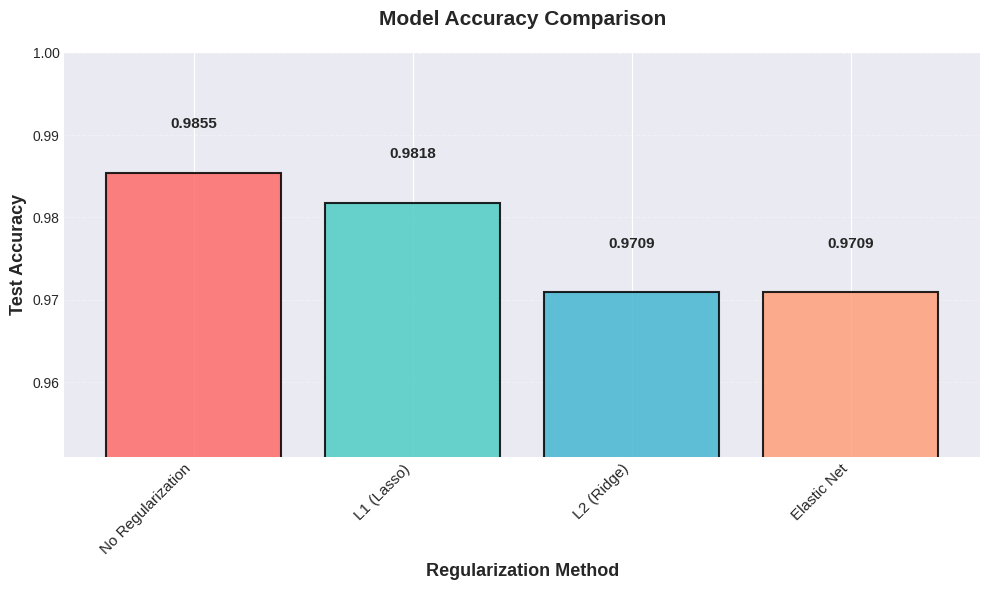

In [16]:

# Visualization 2 - Accuracy Comparison

plt.figure(figsize=(10, 6))

models_list = results_df['Model'].tolist()
accuracies = results_df['Test_Accuracy'].tolist()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
bars = plt.bar(models_list, accuracies, color=colors, alpha=0.85,
               edgecolor='black', linewidth=1.5)

plt.xlabel('Regularization Method', fontsize=13, fontweight='bold')
plt.ylabel('Test Accuracy', fontsize=13, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylim([min(accuracies) - 0.02, 1.0])
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.005,
             f'{height:.4f}',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


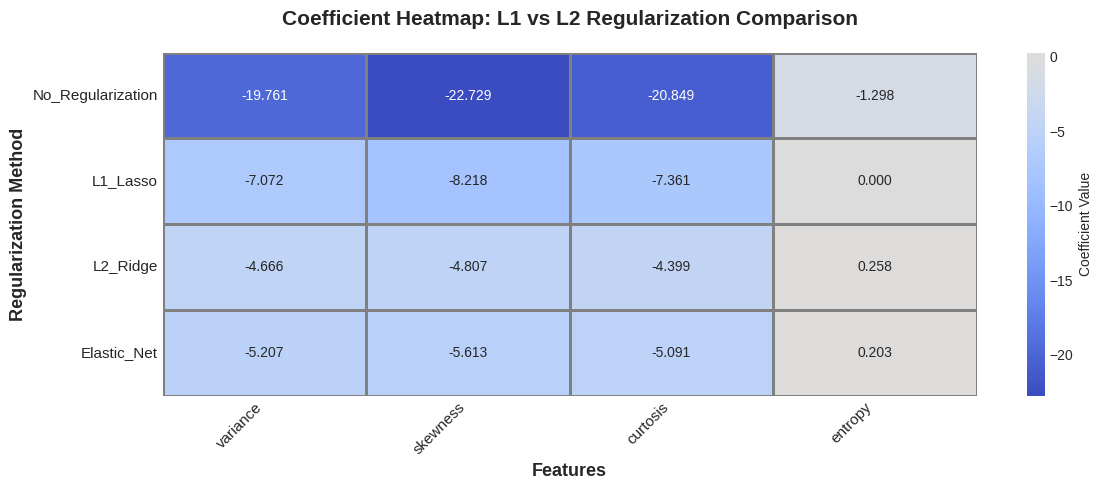

In [17]:

#  Visualization 3 - Coefficient Heatmap
plt.figure(figsize=(12, 5))

weights_for_heatmap = weights_comparison.set_index('Feature').T
sns.heatmap(weights_for_heatmap, annot=True, fmt='.3f', cmap='coolwarm',
            center=0, cbar_kws={'label': 'Coefficient Value'},
            linewidths=1, linecolor='gray')

plt.title('Coefficient Heatmap: L1 vs L2 Regularization Comparison',
          fontsize=15, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=13, fontweight='bold')
plt.ylabel('Regularization Method', fontsize=13, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.tight_layout()
plt.show()


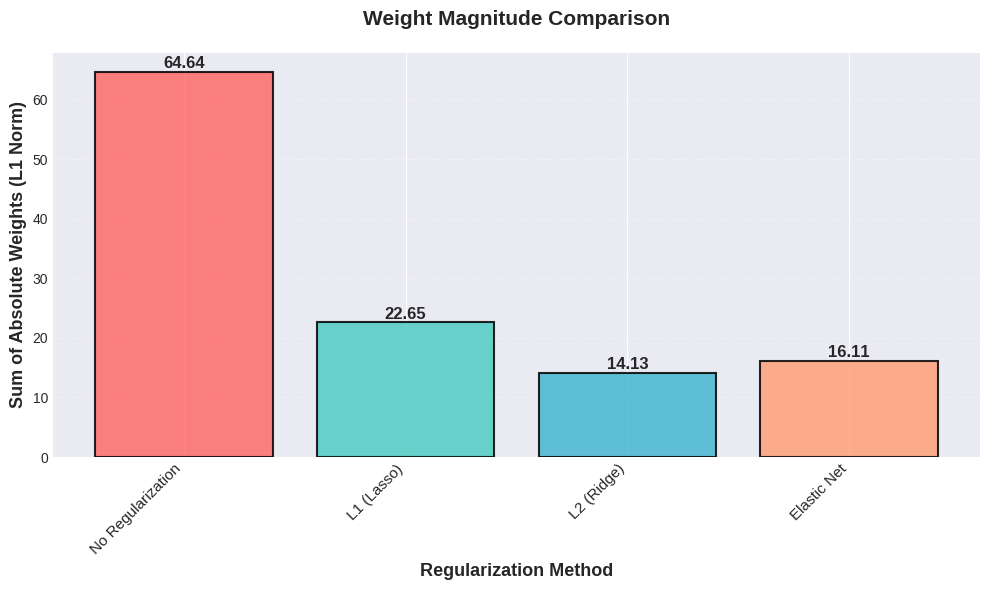

In [18]:

#  Visualization 4 - Weight Magnitude Comparison

plt.figure(figsize=(10, 6))

methods = list(weight_magnitudes.keys())
magnitudes = list(weight_magnitudes.values())

bars = plt.bar(methods, magnitudes,
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'],
               alpha=0.85, edgecolor='black', linewidth=1.5)

plt.xlabel('Regularization Method', fontsize=13, fontweight='bold')
plt.ylabel('Sum of Absolute Weights (L1 Norm)', fontsize=13, fontweight='bold')
plt.title('Weight Magnitude Comparison', fontsize=15, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for i, (method, mag) in enumerate(zip(methods, magnitudes)):
    plt.text(i, mag + 0.1, f'{mag:.2f}', ha='center', va='bottom',
             fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [19]:
# ============================================================
#  Key Findings and Export Results
# ============================================================
print("=" * 60)
print("KEY FINDINGS & INSIGHTS")
print("=" * 60)

print("\n L1 (Lasso) Regularization:")
print("   • Promotes sparsity by shrinking some coefficients to exactly zero")
print("   • Performs automatic feature selection")
print("   • Useful when you suspect many features are irrelevant")

print("\n L2 (Ridge) Regularization:")
print("   • Shrinks all coefficients toward zero but keeps them non-zero")
print("   • Distributes weights more evenly across features")
print("   • Better when all features are potentially relevant")

print("\n Weight Magnitude:")
print(f"   • L1 typically produces the smallest total weight magnitude")
print(f"   • This demonstrates the sparsity-inducing property of L1")

print("\n Regularization Benefits:")
print("   • Prevents overfitting by constraining model complexity")
print("   • Improves generalization to unseen data")
print("   • Makes models more interpretable (especially L1)")

# Export results to CSV files
results_df.to_csv('model_comparison_results.csv', index=False)
weights_comparison.to_csv('weights_comparison.csv', index=False)

print("\n" + "=" * 60)
print("FILES EXPORTED")
print("=" * 60)
print("✓ model_comparison_results.csv")
print("✓ weights_comparison.csv")

print("\n Project completed successfully!")


KEY FINDINGS & INSIGHTS

 L1 (Lasso) Regularization:
   • Promotes sparsity by shrinking some coefficients to exactly zero
   • Performs automatic feature selection
   • Useful when you suspect many features are irrelevant

 L2 (Ridge) Regularization:
   • Shrinks all coefficients toward zero but keeps them non-zero
   • Distributes weights more evenly across features
   • Better when all features are potentially relevant

 Weight Magnitude:
   • L1 typically produces the smallest total weight magnitude
   • This demonstrates the sparsity-inducing property of L1

 Regularization Benefits:
   • Prevents overfitting by constraining model complexity
   • Improves generalization to unseen data
   • Makes models more interpretable (especially L1)

FILES EXPORTED
✓ model_comparison_results.csv
✓ weights_comparison.csv

 Project completed successfully!
